<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/Week_4/Ex1_LSTM_Keras_Spam_Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
comments_df_list = []
comments_file = ['https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/Youtube01-Psy.csv',
                #  'https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/Youtube02-KatyPerry.csv,
                 'https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/Youtube03-LMFAO.csv',
                 'https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/Youtube04-Eminem.csv',
                 'https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/Youtube05-Shakira.csv']
for f in comments_file:
    print(f)
    df = pd.read_csv(f,header=0)
    comments_df_list.append(df)
comments_df = pd.concat(comments_df_list)
# comments_df = comments_df.sample(frac=1.0)
print(comments_df.shape)
comments_df.head(5)

https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/Youtube01-Psy.csv
https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/Youtube03-LMFAO.csv
https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/Youtube04-Eminem.csv
https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/Youtube05-Shakira.csv
(1606, 5)


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [ ]:
df = comments_df.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1)
df['WORDS'] = df['CONTENT'].map(lambda x: len(x.split()))
df.head()

,CONTENT,CLASS,WORDS
0,"Huh, anyway check out this you[tube] channel: ...",1,8
1,Hey guys check out my new channel and our firs...,1,30
2,just for test I have to say murdev.com,1,8
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,11
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,5


In [ ]:
df['WORDS'].describe()

count    1606.000000
mean       15.495641
std        22.237426
min         1.000000
25%         4.000000
50%         7.000000
75%        15.000000
max       213.000000
Name: WORDS, dtype: float64

In [ ]:
df.groupby('CLASS').mean('WORDS')

,WORDS
CLASS,
0,8.121134
1,22.390361


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham-0 and spam-1')

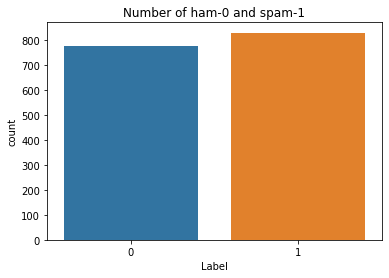

In [ ]:
sns.countplot(df.CLASS)
plt.xlabel('Label')
plt.title('Number of ham-0 and spam-1')

In [ ]:
X = df.CONTENT
Y = df.CLASS

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)

sequences = tok.texts_to_sequences(X_train)
sequence_matrix = sequence.pad_sequences(sequences, maxlen=max_len)

In [ ]:
sequences[:2]

[[221, 221], [21, 146]]

In [ ]:
sequence_matrix[:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 221, 221],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 50))
model.add(LSTM(64))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 50)          50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 96,337
Trainable params: 96,337
Non-trainable params: 0
_________________________________________________________________


Embedding layer = inputs * outputs = 1000 * 50 = 50000 <br/>
LSTM layer = (num_units * input_dim + 1) * num_units * 4 = (64 * 50 +1) * 64 * 4 = 29440 <br/>
Dense layer = 64 * 256 * + 256 = 16640 <br/>
Dropout = 0 <br/>
Dense output layer = 256 * 1 + 1 = 257


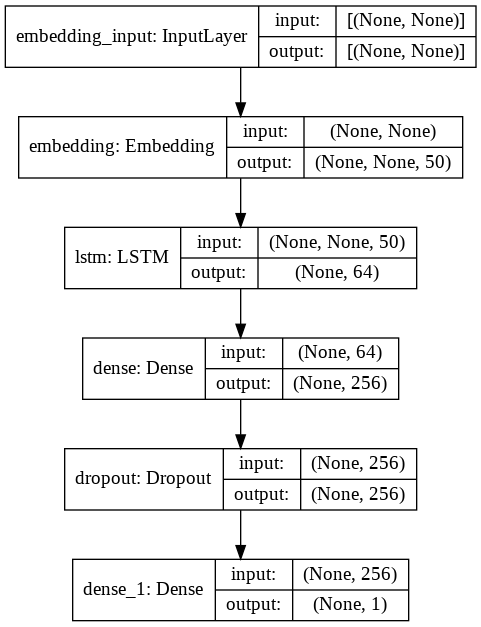

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='LSTM_model.png', show_shapes=True)
Image(filename='LSTM_model.png')

In [ ]:
history = model.fit(sequence_matrix,
                    Y_train,
                    batch_size=128,
                    epochs=50,
                    validation_split=0.2,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/50
8/8 [==============================] - 4s 235ms/step - loss: 0.6646 - accuracy: 0.6307 - val_loss: 1.2891 - val_accuracy: 0.5200
Epoch 2/50
8/8 [==============================] - 1s 163ms/step - loss: 0.6619 - accuracy: 0.7086 - val_loss: 0.5699 - val_accuracy: 0.6533
Epoch 3/50
8/8 [==============================] - 1s 163ms/step - loss: 0.4985 - accuracy: 0.8065 - val_loss: 0.5100 - val_accuracy: 0.7911
Epoch 4/50
8/8 [==============================] - 1s 161ms/step - loss: 0.4191 - accuracy: 0.8676 - val_loss: 0.4305 - val_accuracy: 0.8222
Epoch 5/50
8/8 [==============================] - 1s 165ms/step - loss: 0.2832 - accuracy: 0.9099 - val_loss: 0.3078 - val_accuracy: 0.8622
Epoch 6/50
8/8 [==============================] - 1s 163ms/step - loss: 0.2007 - accuracy: 0.9266 - val_loss: 0.2820 - val_accuracy: 0.9111
Epoch 7/50
8/8 [==============================] - 1s 163ms/step - loss: 0.1593 - accuracy: 0.9566 - val_loss: 0.1947 - val_accuracy: 0.9244
Epoch 8/50
8/8 [====

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len) 

In [ ]:
accr = model.evaluate(test_sequences_matrix, Y_test)

16/16 [==============================] - 0s 18ms/step - loss: 0.1968 - accuracy: 0.9336


In [ ]:
print('Test set\n Loss = {:0.3f}\n Acc = {:0.3f}'.format(accr[0], accr[1]))

Test set
 Loss = 0.197
 Acc = 0.934


In [ ]:
from tensorflow.keras.models import load_model

model.save('LSTM_spam_email.h5')

In [ ]:
X_new = pd.Series(data = ["Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!", 
         "Why dafuq is a Korean song so big in the USA. Does that mean we support  Koreans? Last time I checked they wanted to bomb us."])


In [ ]:
test_sequences_new = tok.texts_to_sequences(X_new)
test_sequences_matrix_new = sequence.pad_sequences(test_sequences_new, maxlen=max_len)

In [ ]:
X_new

0    Hey guys check out my new channel and our firs...
1    Why dafuq is a Korean song so big in the USA. ...
dtype: object

In [ ]:
test_sequences_matrix_new

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  63,  49,   6,   5,   9,  35,  33,   8,
         95, 193, 517,   2,  20,  70,   4, 292,   4,  29,   4, 466,  24,
        207,  10,  25,  60,   8,  24,  28],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       